In [1]:
# links
# https://arxiv.org/pdf/1704.03477.pdf
# https://arxiv.org/pdf/1904.02632.pdf

In [2]:
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# https://stackoverflow.com/questions/16249736/how-to-import-data-from-mongodb-to-pandas
import pymongo
import pandas as pd
import numpy as np

from pymongo import MongoClient
from processing import *

from IPython.display import Image

# !pip install drawsvg
# Works on linux only!
# sudo apt-get install libcairo2
import drawSvg as draw

In [4]:
#test drawSvg
# https://pypi.org/project/drawSvg/

def plotLine(StartPoint, EndPoint):
    d = draw.Drawing(200,100,origin = 'center', displayInline = False)
    d.append(draw.Lines(StartPoint.X, StartPoint.Y, EndPoint.X, EndPoint.Y, close = False, fill='#eeee00', stroke = 'black'))
    d.setPixelScale(2)
    d.rasterize()
    return(d)

class pnt2:
    def __init__(self, x,y):
        self.X = x
        self.Y = y
start = pnt2(100,200)
end = pnt2(0,0)
plotLine(start,end)

In [5]:
client = MongoClient('mongodb://192.168.0.104:27017/')
#client = MongoClient('mongodb://localhost:27017')
client

MongoClient(host=['192.168.0.104:27017'], document_class=dict, tz_aware=False, connect=True)

In [6]:
db = client.geometry
db

Database(MongoClient(host=['192.168.0.104:27017'], document_class=dict, tz_aware=False, connect=True), 'geometry')

In [7]:
objects = db.objects

In [8]:
fileidsWithDims = objects.find({'ClassName':'AcDbRotatedDimension'}).distinct('FileId')[:7]

In [9]:
data = query_collection_to_dataframe(objects, fileidsWithDims[0])
data[data['ClassName'] == 'AcDbText'] ['Position']

0      {'ClassName': 'Point3D', 'X': 7.69577632622433...
1      {'ClassName': 'Point3D', 'X': 8.73335230211607...
2      {'ClassName': 'Point3D', 'X': 8.73335230211607...
3      {'ClassName': 'Point3D', 'X': 8.73335230211607...
4      {'ClassName': 'Point3D', 'X': 8.73335230211607...
                             ...                        
446    {'ClassName': 'Point3D', 'X': 273.412136123334...
451    {'ClassName': 'Point3D', 'X': 318.893063402958...
461    {'ClassName': 'Point3D', 'X': 271.628777158114...
468    {'ClassName': 'Point3D', 'X': 316.396363346254...
474    {'ClassName': 'Point3D', 'X': 99.8858080932435...
Name: Position, Length: 147, dtype: object

In [10]:
images = []
for fileId in fileidsWithDims:
    images.append(generate_image_by_id(objects, fileId))

id: 006f290c-7280-491b-b7d7-971ed82de1a5 entities: 478
id: 007bceda-c8e6-4cc7-97f9-270adf44b19c entities: 1556
id: 0100c16b-c7c9-4265-92b9-950bf5d2c9ec entities: 277
id: 013edfac-9865-4422-a5f2-3220d142116d entities: 1265
id: 0195a12e-0226-4de9-b2a7-04c149af4aa0 entities: 643
id: 01aaf254-a108-4bb2-98c5-38caa8ab1efd entities: 6
id: 01afac87-2be6-4a8e-9a95-66c1c54d5165 entities: 61


img/006f290c-7280-491b-b7d7-971ed82de1a5.png


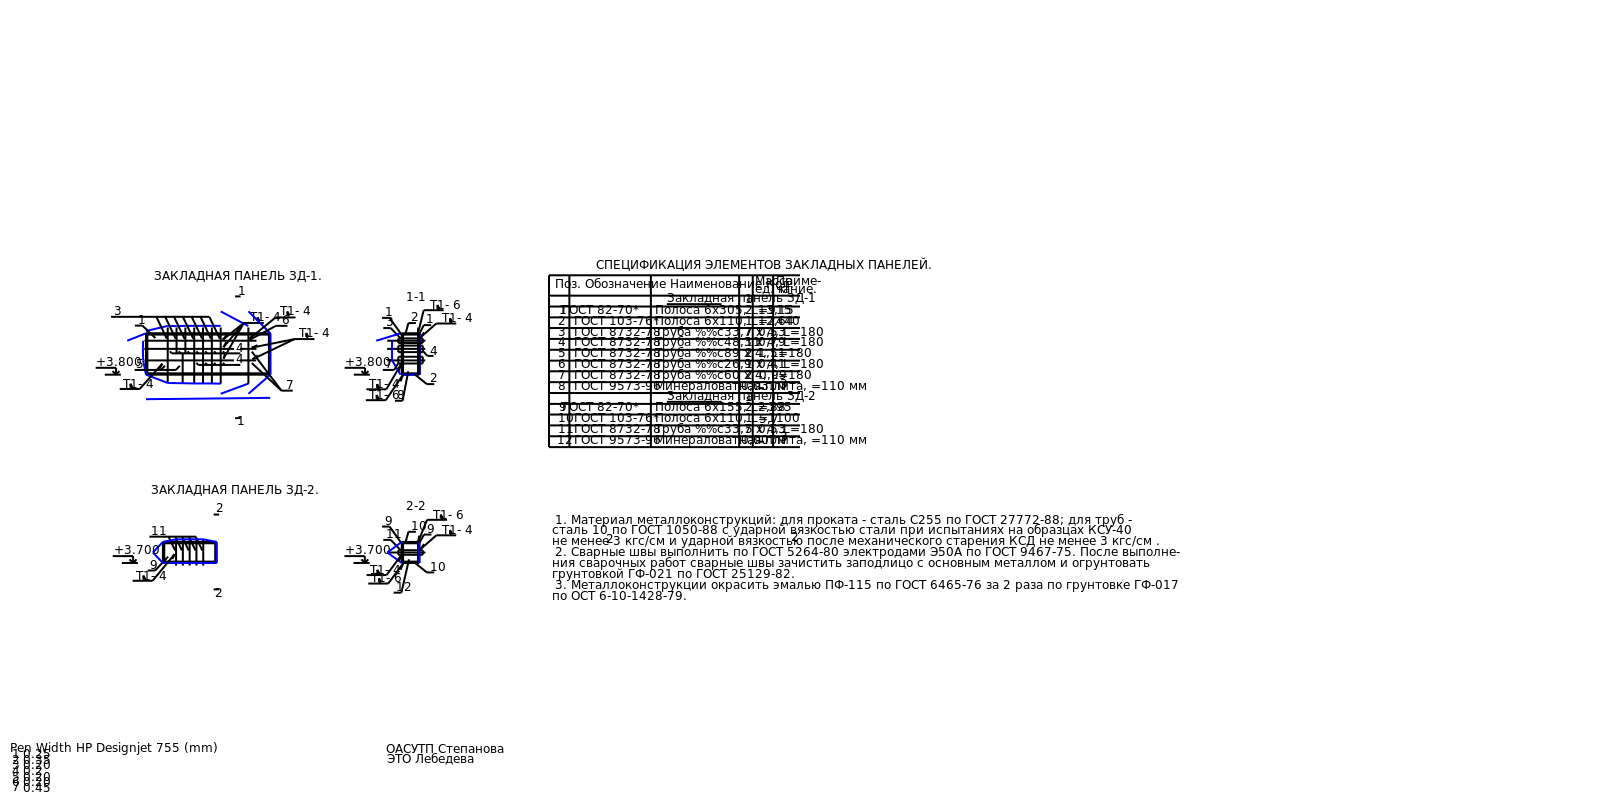

img/007bceda-c8e6-4cc7-97f9-270adf44b19c.png


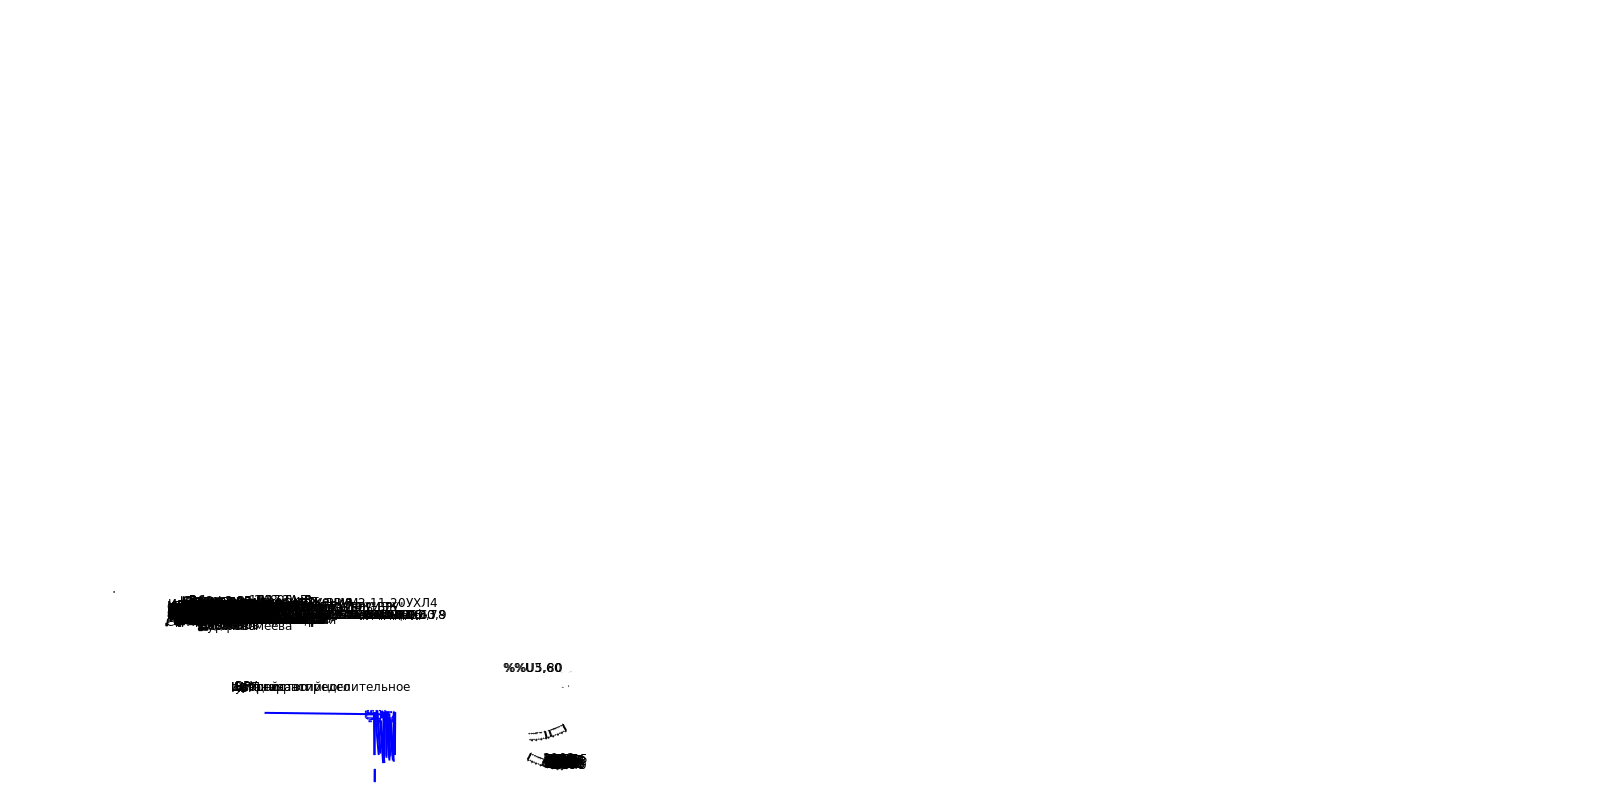

img/0100c16b-c7c9-4265-92b9-950bf5d2c9ec.png


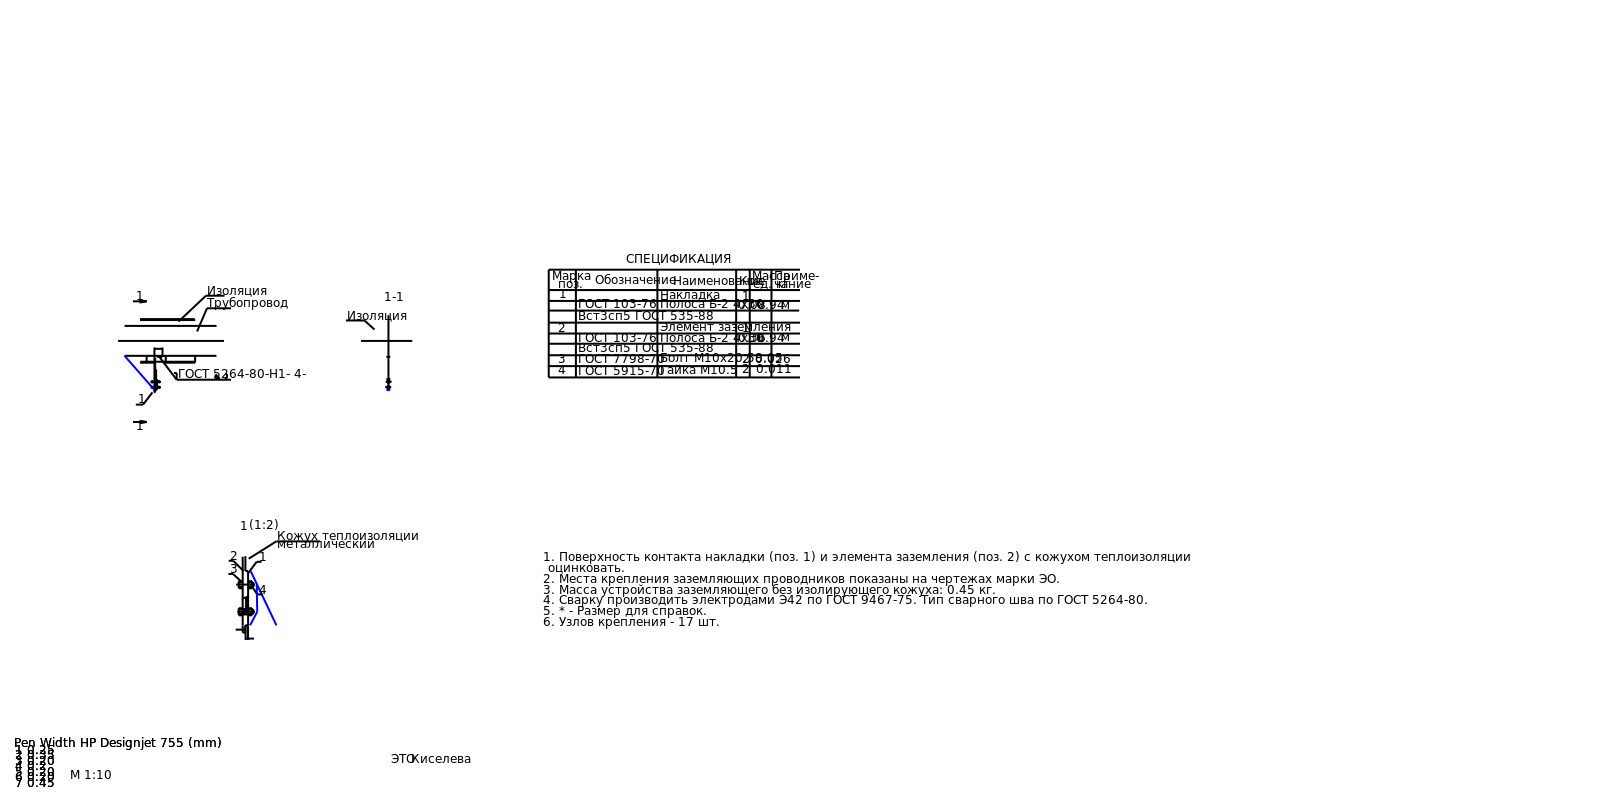

img/013edfac-9865-4422-a5f2-3220d142116d.png


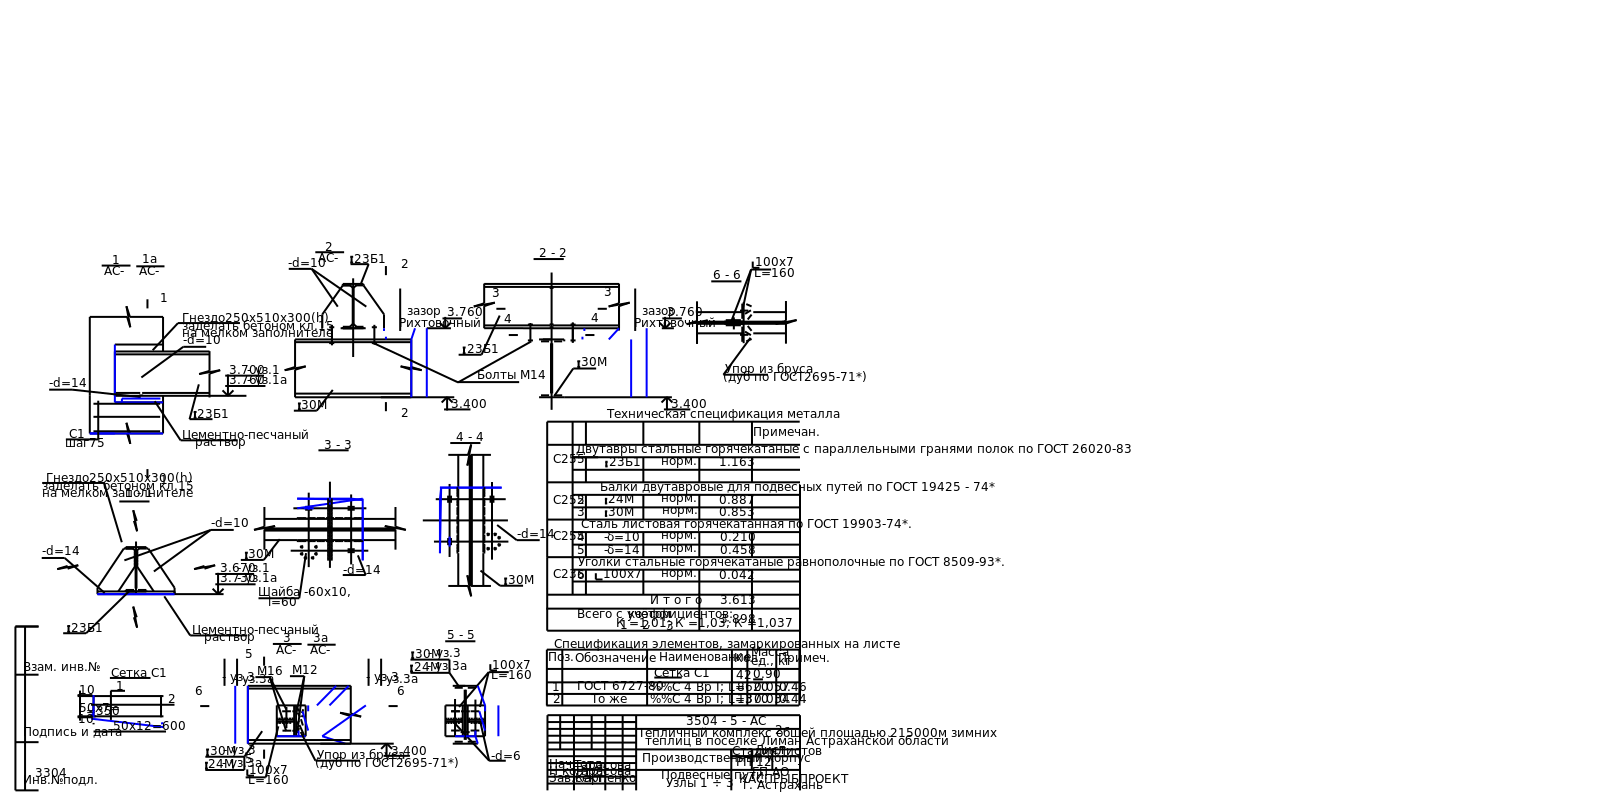

img/0195a12e-0226-4de9-b2a7-04c149af4aa0.png


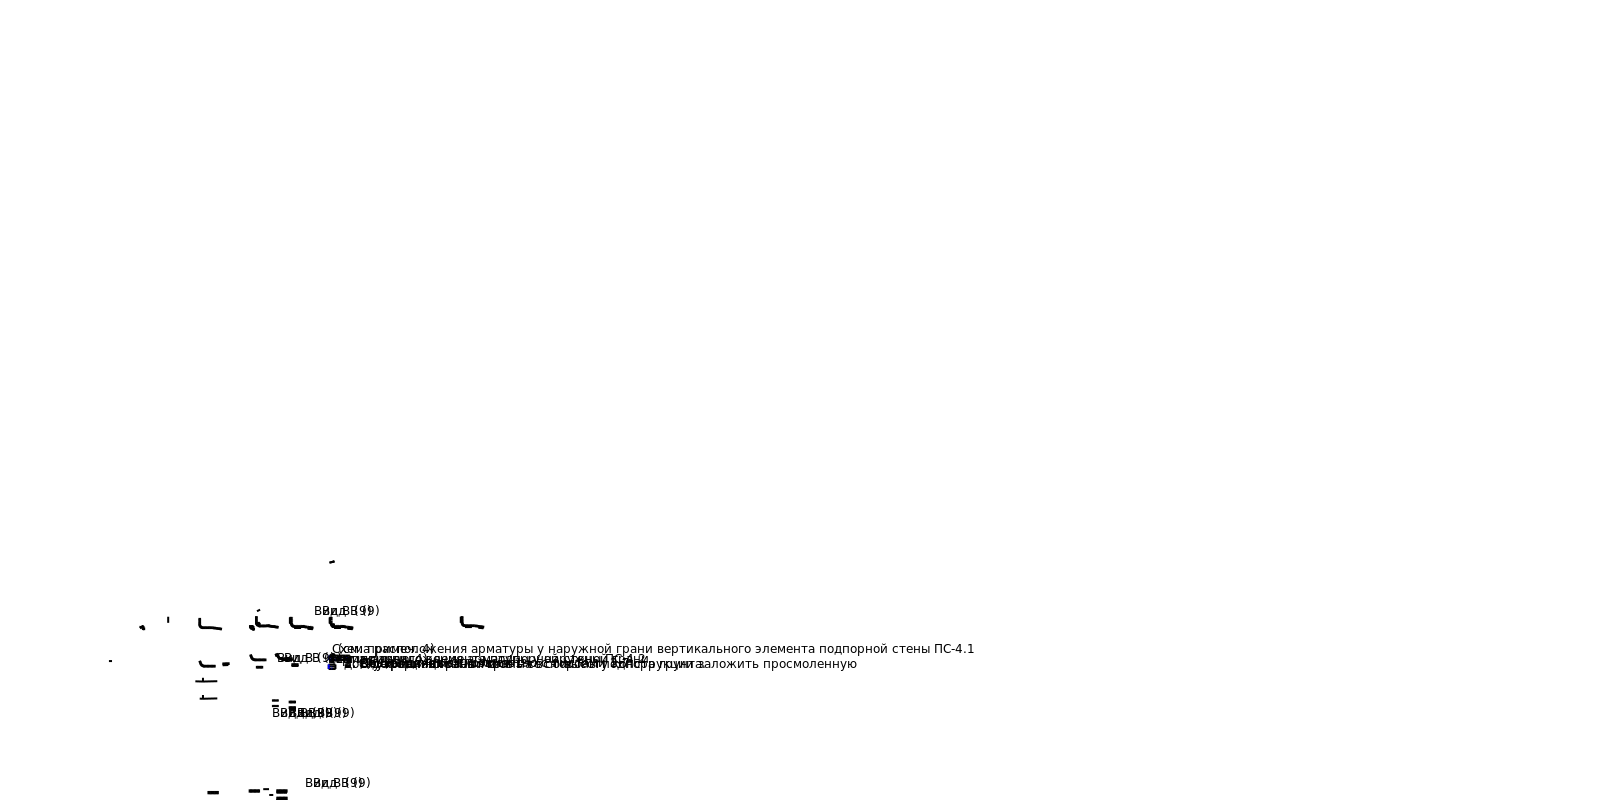

img/01aaf254-a108-4bb2-98c5-38caa8ab1efd.png


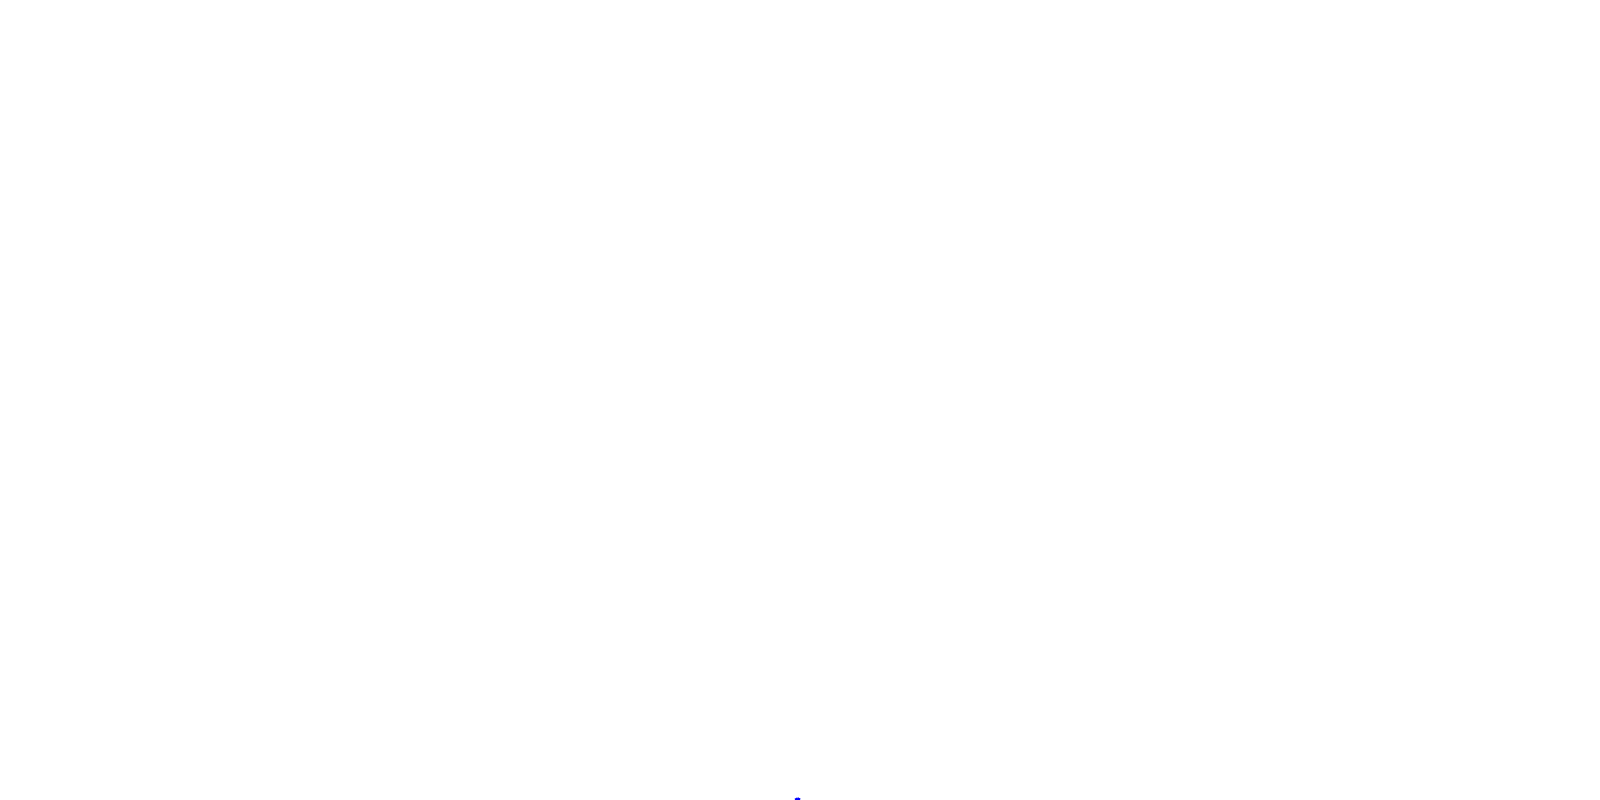

img/01afac87-2be6-4a8e-9a95-66c1c54d5165.png


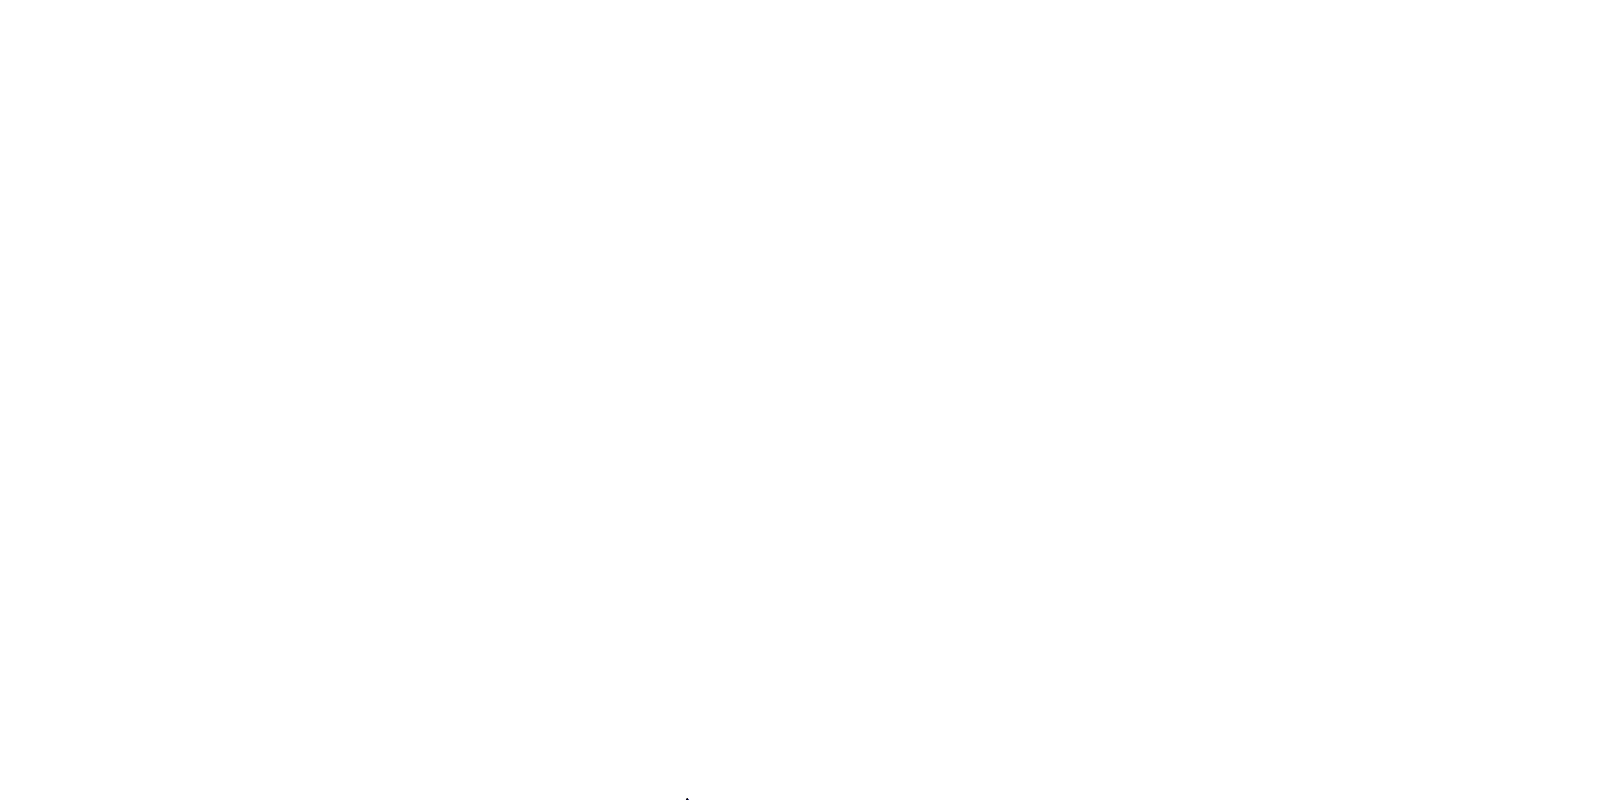

In [11]:
# https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook

for img in images:
    print(img)
    display(Image(img))

In [12]:
f_id = '01aaf254-a108-4bb2-98c5-38caa8ab1efd'
debug_data = query_collection_to_dataframe(objects, f_id)    

In [13]:
# print(tb.columns)
cols_to_expand = ['XLine1Point', 'XLine2Point', 'StartPoint', 'EndPoint', 'Position']
debug_data = expand_columns(debug_data, cols_to_expand)

expanded_cols = []
for column in debug_data.columns:
    m = ".X" in column or ".Y" in column
    # print(column, m)
    if m:
        expanded_cols.append(column)

cols_to_expand.extend(expanded_cols)
debug_data[cols_to_expand]

KeyError: "['Position'] not in index"

In [ ]:
debug_data = normalize(debug_data)
debug_data


In [ ]:
generate_file2(debug_data)
display(Image('img/' + f_id + '.png'))